# Statistica - Metodo massima verosimiglianza
Implementazione del metodo di massima verosimiglianza sul dataset del tempo di sopravvivenza di un paziende dopo un trapianto di cuore (studio 1967-1974).
<br><br>Dataset info:
[Transplant Survival Data](https://www.statsmodels.org/devel/datasets/generated/heart.html)

In [17]:
%conda install statsmodels

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
%matplotlib inline

Caricamento del dataset a partire dalla libreria "statsmodels.datasets"

In [19]:
dataSet = statsmodels.datasets.heart.load_pandas().data

All'interno del dataset il valore censors (0) sta a significare che il paziente era vivo al momento della conclusione dello studio e di cui non conosciamo l'effettiva aspettativa di vita.
Per semplicità questo caso non verrà considerato ai fini della trattazione.

In [20]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survival  69 non-null     float64
 1   censors   69 non-null     float64
 2   age       69 non-null     float64
dtypes: float64(3)
memory usage: 1.7 KB


Esplorazione del dataset

In [21]:
dataSet.describe()

,survival,censors,age
count,69.000000,69.000000,69.000000
mean,376.797101,0.652174,46.134783
std,458.362000,0.479770,8.874846
min,1.000000,0.000000,19.700000
25%,47.000000,0.000000,42.500000
50%,147.000000,1.000000,48.000000
75%,592.000000,1.000000,52.200000
max,1775.000000,1.000000,64.500000


In [22]:
dataSet.head()

,survival,censors,age
0,15.0,1.0,54.3
1,3.0,1.0,40.4
2,624.0,1.0,51.0
3,46.0,1.0,42.5
4,127.0,1.0,48.0


In [23]:
dataSet.tail()

,survival,censors,age
64,14.0,1.0,40.3
65,167.0,0.0,26.7
66,110.0,0.0,23.7
67,13.0,0.0,28.9
68,1.0,0.0,35.2


In [24]:
dataSet = dataSet[dataSet.censors == 1]
survival = dataSet.survival

Text(0, 0.5, 'Number of patients')

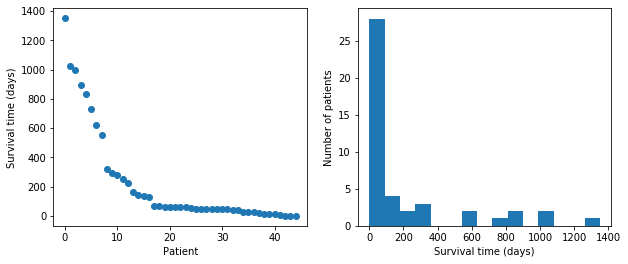

In [25]:
ig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(sorted(survival)[::-1], 'o')
ax1.set_xlabel('Patient')
ax1.set_ylabel('Survival time (days)')

ax2.hist(survival, bins=15)
ax2.set_xlabel('Survival time (days)')
ax2.set_ylabel('Number of patients')

In [26]:
survivalMean = survival.mean()
rate = 1. / survivalMean

In [27]:
survivalMax = survival.max()

days = np.linspace(0., survivalMax, 1000)

dt = survivalMax / 999.

Ottengo la funzione di densità di probabilità.
I parametri sono la scala, e il reciproco del tasso stimato.

In [28]:
dist_exp = st.expon.pdf(days, scale=1. / rate)

Plot e istogramma

Text(0, 0.5, 'Number of patients')

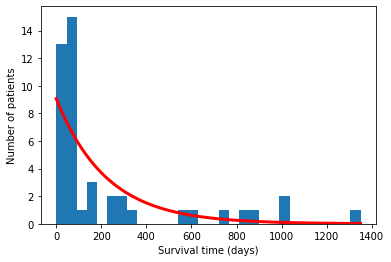

In [29]:
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * survivalMax / nbins,'-r', lw=3)
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")

Il fit non è perfetto.
Di seguito viene calcolata la stime del valore di massima verosimiglianza.

In [30]:
dist = st.expon
args = dist.fit(survival)
args

(1.0, 222.2888888888889)